In [13]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using Theano backend.


In [20]:
folder = "./regression_sample"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]

print("Working with {0} images".format(len(onlyfiles)))
print("Image examples: ")

onlyfiles

Working with 17 images
Image examples: 


['30_1477786848.jpg',
 '30_1477786860.jpg',
 '30_1477787358.jpg',
 '30_1477787370.jpg',
 '30_1477787364.jpg',
 '30_1477786800.jpg',
 '30_1477786806.jpg',
 '30_1477786812.jpg',
 '15_1477788492.jpg',
 '15_1477788486.jpg',
 '30_1477786836.jpg',
 '15_1477788480.jpg',
 '30_1477786830.jpg',
 '30_1477786824.jpg',
 '30_1477786818.jpg',
 '30_1477786842.jpg',
 '30_1477786854.jpg']

In [19]:
#os.remove('./regression_sample/.DS_Store')

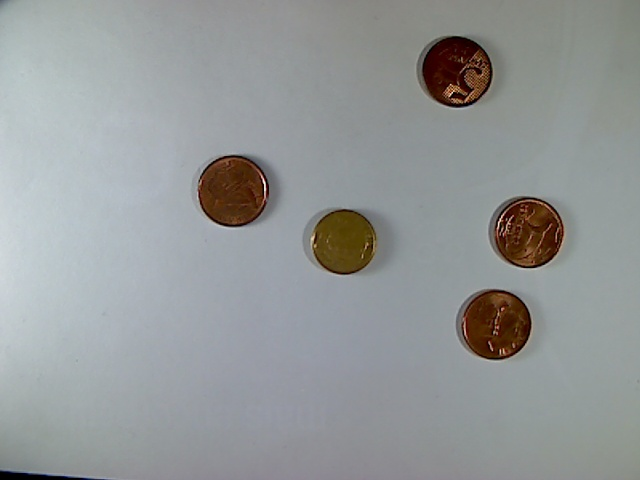

In [21]:
display(_Imgdis(filename=folder + "/" + onlyfiles[0], width=240, height=320))

In [22]:
train_files = []
y_train = []
i=0
for _file in onlyfiles:
    train_files.append(_file)
    label_in_file = _file.find("_")
    
    y_train.append(int(_file[0:label_in_file]))
    
print("Files in train_files: %d" % len(train_files))

# Original Dimensions
image_width = 640
image_height = 480
ratio = 4

image_width = int(image_width / ratio)
image_height = int(image_height / ratio)

channels = 3
nb_classes = 1

dataset = np.ndarray(shape=(len(train_files), channels, image_height, image_width),
                     dtype=np.float32)

i = 0
for _file in train_files:
    img = load_img(folder + "/" + _file)  # this is a PIL image
    img.thumbnail((image_width, image_height))
    # Convert to Numpy Array
    x = img_to_array(img)  
    x = x.reshape((3, 120, 160))
    # Normalize
    x = (x - 128.0) / 128.0
    dataset[i] = x
    i += 1
    if i % 250 == 0:
        print("%d images to array" % i)
print("All images to array!")

Files in train_files: 17
All images to array!


In [ ]:
#from sklearn.model_selection import train_test_split

#Splitting 
#X_train, X_test, y_train, y_test = train_test_split(dataset, y_train, test_size=0.2, random_state=33)
#X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=33)
#print("Train set size: {0}, Val set size: {1}, Test set size: {2}".format(len(X_train), len(X_val), len(X_test)))